In [1]:
import psycopg2,datetime,heapq
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,time
import pandas as pd
import random
conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
#print("Opened database successfully")
cur = conn.cursor()
#conn.close()

In [2]:
def showimage(ID):
    conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
    cur = conn.cursor()
    
    Path = ""
    cur.execute("SELECT doc FROM trademark WHERE caseno = %s"%ID)
    doc = cur.fetchall()
    Path += doc[0][0] + "/"
    
    cur.execute("SELECT Filename FROM rcp WHERE caseno = %s"%ID)
    name = cur.fetchall()
    Path += name[0][0]
    file = name[0][0]
    
    conn.close()
    
    os.chdir('/service/trademark/raw_register_data/')
    BigPath = '/service/trademark/raw_register_data/' + Path
    img = mpimg.imread(Path)
    imgplot = plt.imshow(img)
    plt.show()

    return file,BigPath
    

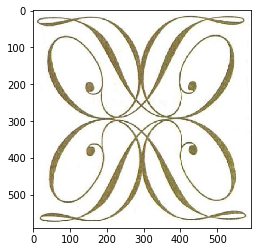

('imagesdata/egimg_104029742_1_042024.jpg',
 '/service/trademark/raw_register_data/TrademarkRegXMLB_042024/imagesdata/egimg_104029742_1_042024.jpg')

In [3]:
showimage("104029742")

In [5]:
from shutil import copy
from jinja2 import Environment, FileSystemLoader 
os.chdir('/home/jack/4_Selenium')

In [6]:
def generate_html(body,resultname):
    os.chdir('/home/jack/4_Selenium')
    env = Environment(loader=FileSystemLoader('./'))
    template = env.get_template('template.html')     
    with open("%s.html"%resultname,'w+') as fout:   
        html_content = template.render(body=body)
        fout.write(html_content)

In [59]:
def getimgs(casenos,num):
    result = []
    for x in range(num):
        random.seed(time.time())
        rad = random.randint(0,len(casenos)-1)
        caseno = casenos[rad]
#         print("Caseno: ",caseno)
        file = getimagepath(str(caseno))
        if file == "None":
            continue
        result.append((caseno,file))
    return result

def getimagepath(ID):
    try:
        conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
        cur = conn.cursor()

        Path = ""
        cur.execute("SELECT doc FROM trademark WHERE caseno = %s"%ID)
        doc = cur.fetchall()
        Path += doc[0][0] + "/"

        cur.execute("SELECT Filename FROM rcp WHERE caseno = %s"%ID)
        name = cur.fetchall()
        Path += name[0][0]
        file = name[0][0]

        conn.close()

        os.chdir('/service/trademark/raw_register_data/')
        BigPath = '/service/trademark/raw_register_data/'+ Path
    except:
        return "None"

    return (file,BigPath)

In [83]:
#main
os.chdir('/home/jack/4_Selenium')
df = pd.read_csv('ALL.csv')
#df.info()
c = sorted(list(set(df['category'].to_list())))
c2 = sorted(list(set(x[:2] for x in c)))
cnt = 0
body = []
result = {}
casenocheck = []
sums = 0

for i in c2:
    print(i)
    casenocheck.append([])
    ddf = df[df.category.str.contains(i)]
    ddf.head()
    ddf.tail()
    casenos = ddf['caseno'].to_list()
    print('cate:',i,":",len(casenos),end='')
    
    a = cnt + 1
    cate = top[cnt]
    
    r = getimgs(casenos,10) 
    content = "<div class='t'>"
    print(" len:",len(r))

    for y in r:
        caseno = y[0] 
        if caseno not in casenos:
            print("幹你老師")
        filename = y[1][0]
        Path = y[1][1]

        content += '<img src="%s" width="300" alt="%s">'%(filename,str(caseno))
        content += '\n\t'

        copy(Path,'/home/jack/4_Selenium/imagesdata/') 
        casenocheck[-1].append(caseno)
        
    content += "</div>"
    result['target%s'%str(a)] = cate
    result['text%s'%str(a)] = content
    cnt += 1
             
        
# print(result)
body.append(result)
generate_html(body,"Category") 


01
cate: 01 : 78966 len: 9
02
cate: 02 : 66378 len: 9
03
cate: 03 : 49203 len: 10
04
cate: 04 : 26337 len: 10
05
cate: 05 : 11278 len: 7
06
cate: 06 : 37379 len: 10
07
cate: 07 : 5786 len: 9
08
cate: 08 : 5446 len: 8
09
cate: 09 : 6015 len: 8
10
cate: 10 : 27579 len: 10
11
cate: 11 : 118746 len: 8
12
cate: 12 : 203038 len: 9
13
cate: 13 : 832 len: 9
14
cate: 14 : 98 len: 9
15
cate: 15 : 7 len: 10
16
cate: 16 : 14 len: 8
17
cate: 17 : 28 len: 5


In [8]:
with open('top.txt') as f:
    top = f.read().split('\n')
print(top)

['01 人物', '02 動物', '03 植物', '04 天體、自然現象、地圖模型、景觀', '05 建築物', '06 器物', '07 運輸工具', '08 服飾╱織物', '09 加工食品', '10 盾牌、皇冠、旗幟、有價標記', '11 文數字及符號', '12 抽象幾何圖形', '13 立體圖形', '14 顏色', '15 全像圖', '16 動態商標', '17 其他商標']


In [57]:
conn.close()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637130 entries, 0 to 637129
Data columns (total 2 columns):
caseno      637130 non-null int64
category    637130 non-null object
dtypes: int64(1), object(1)
memory usage: 9.7+ MB


In [53]:
len(df[df.category.str.contains('01')]['caseno'].tolist())
len(set(df[df.category.str.contains('01')]['caseno'].tolist()))

66992

In [101]:
s = int(input())
df[df['caseno'] == s]

 104064723


,caseno,category
232543,104064723,06-A-00
637105,104064723,17-F-00


In [80]:
result

{'target1': '01 人物',
 'text1': '<div class=\'t\'><img src="imagesdata/egimg_109029392_1_047020.jpg" width="300" alt="109029392">\n\t<img src="imagesdata/egimg_108001045_1_046014.jpg" width="300" alt="108001045">\n\t<img src="imagesdata/egimg_101034888_1_040003.jpg" width="300" alt="101034888">\n\t<img src="imagesdata/egimg_102063385_1_041014.jpg" width="300" alt="102063385">\n\t<img src="imagesdata/egimg_106062267_1_045007.jpg" width="300" alt="106062267">\n\t<img src="imagesdata/egimg_104069826_1_043014.jpg" width="300" alt="104069826">\n\t<img src="imagesdata/egimg_106034735_1_044024.jpg" width="300" alt="106034735">\n\t<img src="imagesdata/egimg_102072969_1_041016.jpg" width="300" alt="102072969">\n\t<img src="imagesdata/egimg_107040492_1_046002.jpg" width="300" alt="107040492">\n\t<img src="imagesdata/egimg_109005177_1_047016.jpg" width="300" alt="109005177">\n\t</div>',
 'target2': '02 動物',
 'text2': '<div class=\'t\'><img src="imagesdata/egimg_107083384_1_046014.jpg" width="300" 